In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
RefugeesDF = pd.read_csv('refugeesAndMigrants.csv')
RefugeesDF
#01/01/93 shown three times, Happens with multiple dates with different amount of occurance depending on  
#The number of locations where bodies were found on that date, 3 different locations were reported for 01/01/93
#Have to deal with last 5 rows: 4 with the '1993' dates and the 1 with the NaN values 
#Possibly take out the only '1993' rows, but add their 6 deaths to '01/01/93' (first_date after)
#Orginal DF with 3,931

,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident
0,05/05/18,4.0,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya
1,30/04/18,2.0,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya
2,30/04/18,1.0,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya
3,30/04/18,6.0,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya
4,30/04/18,1.0,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown
5,29/04/18,19.0,N.N. (1 man),Africa,"16 drowned in shipwreck off Cap Falcon, Oran (...",ObsAlgerie/Caminando/EFE/Réf/QUOTI/IOM,Algeria
6,25/04/18,17.0,N.N.,Sub-Saharan Africa,5 drowned afer boat sank between Morocco and S...,ElDiario/Caminando/SalvaM/EuroPress,unknown
7,22/04/18,11.0,N.N. (1 boy; 10 men),unknown,drowned when rubber dinghy overturned in the M...,MEE/Reu./IOM Libya/JapanTimes,Libya
8,20/04/18,1.0,"N.N. (boy, 6 months)",Eritrea,strangled by desperate mother who hanged herse...,Berliner Ztg/FR-th/OTZ,Germany
9,20/04/18,1.0,"Snaid Tadese (woman, 19)",Eritrea,"suicide, strangled her baby and hanged herself...",Berliner Ztg/FR-th/OTZ,Germany


In [3]:
RefugeesDF.drop(RefugeesDF.tail(1).index, inplace = True)
#Took out Last 5 rows in dataframe (first 5 entries in the time-line)

In [4]:
RefugeesDF.set_value(3926,'number',7)
RefugeesDF
#Added 5 more deaths to 01/01/93 deaths to keep them in count

/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,found dead,number,"name, gender, age",region of origin,cause of death,source,country of incident
0,05/05/18,4.0,N.N. (1 man),Africa,1 died off coast of Tripoli (LY) after Libyan ...,AFP/IOM Libya/BangkokPost,Libya
1,30/04/18,2.0,N.N. (2 men),unknown,bodies recovered in Gasr Garabulli (aka Castel...,IOM Libya,Libya
2,30/04/18,1.0,N.N. (woman),unknown,body recovered on Tajoura beach (LY),IOM Libya,Libya
3,30/04/18,6.0,N.N. (1 baby; 5 men),unknown,bodies recovered in Zuwara (LY),IOM Libya,Libya
4,30/04/18,1.0,N.N. (man),Algeria,drowned trying to swim across the Kolpa River ...,IOM Slovenia/TotSloveniaNews,unknown
5,29/04/18,19.0,N.N. (1 man),Africa,"16 drowned in shipwreck off Cap Falcon, Oran (...",ObsAlgerie/Caminando/EFE/Réf/QUOTI/IOM,Algeria
6,25/04/18,17.0,N.N.,Sub-Saharan Africa,5 drowned afer boat sank between Morocco and S...,ElDiario/Caminando/SalvaM/EuroPress,unknown
7,22/04/18,11.0,N.N. (1 boy; 10 men),unknown,drowned when rubber dinghy overturned in the M...,MEE/Reu./IOM Libya/JapanTimes,Libya
8,20/04/18,1.0,"N.N. (boy, 6 months)",Eritrea,strangled by desperate mother who hanged herse...,Berliner Ztg/FR-th/OTZ,Germany
9,20/04/18,1.0,"Snaid Tadese (woman, 19)",Eritrea,"suicide, strangled her baby and hanged herself...",Berliner Ztg/FR-th/OTZ,Germany


In [5]:
RefugeesDF.isnull().sum()

found dead             0
number                 0
name, gender, age      0
region of origin       0
cause of death         0
source                 0
country of incident    0
dtype: int64

In [6]:
#New DF for focusing on Time Series
TS_Refugees_df = RefugeesDF[["found dead", "number"]]
TS_Refugees_df
#3898 has 'Sep 93' as it's date, need to check if there are others like that and fix them
#Begins with 3,926 rows

,found dead,number
0,05/05/18,4.0
1,30/04/18,2.0
2,30/04/18,1.0
3,30/04/18,6.0
4,30/04/18,1.0
5,29/04/18,19.0
6,25/04/18,17.0
7,22/04/18,11.0
8,20/04/18,1.0
9,20/04/18,1.0


In [7]:
TS_Refugees_df[TS_Refugees_df['found dead'] == "3010/16"]
TS_Refugees_df.set_value(475,'found dead', "30/10/16")
#Quick Fix for one Messy Date missing a slash

/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,found dead,number
0,05/05/18,4.0
1,30/04/18,2.0
2,30/04/18,1.0
3,30/04/18,6.0
4,30/04/18,1.0
5,29/04/18,19.0
6,25/04/18,17.0
7,22/04/18,11.0
8,20/04/18,1.0
9,20/04/18,1.0


In [8]:
MessedUpDF = TS_Refugees_df[TS_Refugees_df['found dead'].str.match('[A-Z][a-z]')]
Messy_Dates = MessedUpDF['found dead']
Messy_Dates
#Found all dates not in the right format, 455 rows to fix or delete
#Can Possibly search for each months string (EX: 'Jan/', think need to include space) and replace it with '01/01/'

141       Jan 18
142       Jan 18
193       Nov 17
194       Nov 17
195       Nov 17
196       Nov 17
213       Oct 17
214       Oct 17
258       Aug 17
259       Aug 17
281       Jul 17
314       Jun 17
345       May 17
346       May 17
347       May 17
348       May 17
409       Feb 17
439       Jan 17
450       Dec 16
492       Oct 16
499       Sep 16
568       Mar 16
569       Mar 16
570       Mar 16
571       Mar 16
603       Jan 16
626       Dec 15
627       Dec 15
628       Dec 15
629       Dec 15
          ...   
3646      Jun 96
3690      Jan 96
3703      Nov 95
3711      Oct 95
3712      Oct 95
3750      Jul 95
3751      Jul 95
3752      Jul 95
3763      Jun 95
3764      Jun 95
3765      Jun 95
3770      May 95
3784      Mar 95
3791      Feb 95
3792      Feb 95
3801      Jan 95
3802      Jan 95
3809      Dec 94
3812      Nov 94
3840      Aug 94
3853    Jun 1994
3859      May 94
3863      Apr 94
3864      Apr 94
3872    Feb 1994
3875      Jan 94
3876      Jan 94
3889      Dec 

In [9]:
MessedUpDF['number'].sum()
#Saving 2,865 deaths to remain in our dataset

2865.0

In [10]:
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Jan\s', value = '01/01/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Feb\s', value = '01/02/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Mar\s', value = '01/03/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Apr\s', value = '01/04/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='May\s', value = '01/05/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Jun\s', value = '01/06/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Jul\s', value = '01/07/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Aug\s', value = '01/08/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Sep\s', value = '01/09/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Oct\s', value = '01/10/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Nov\s', value = '01/11/', regex = True)
TS_Refugees_df = TS_Refugees_df.replace(to_replace ='Dec\s', value = '01/12/', regex = True)
TS_Refugees_df
#Fix for all the Messy Dates by just adding the months since the years were already in the cells
#Manage to keep all 455 death counts for those messy days

,found dead,number
0,05/05/18,4.0
1,30/04/18,2.0
2,30/04/18,1.0
3,30/04/18,6.0
4,30/04/18,1.0
5,29/04/18,19.0
6,25/04/18,17.0
7,22/04/18,11.0
8,20/04/18,1.0
9,20/04/18,1.0


In [11]:
YearsOnlyDF = TS_Refugees_df[TS_Refugees_df['found dead'].str.match('\d\d\d\d')]
A = YearsOnlyDF.index
YearsOnlyDF['found dead'].count()
#Finding amount of cells have only the year
# 54 is fairly small number
#willing to drop since planning for monthly interpretations and would bias predictions if I decided months 

54

In [12]:
YearsOnlyDF['number'].sum()
# 338 Deaths would be taken out of predicitons from just 50 dates/rows

338.0

In [13]:
TS_Refugees_df = TS_Refugees_df.drop(A)
TS_Refugees_df
#Removed the 54 Year Only Rows
#Need to fix Whole Year format for 1994, as well as one for 12/1/2000

,found dead,number
0,05/05/18,4.0
1,30/04/18,2.0
2,30/04/18,1.0
3,30/04/18,6.0
4,30/04/18,1.0
5,29/04/18,19.0
6,25/04/18,17.0
7,22/04/18,11.0
8,20/04/18,1.0
9,20/04/18,1.0


In [14]:
TS_Refugees_df.set_value(3853,'found dead', "01/06/94")
TS_Refugees_df.set_value(3872,'found dead', "01/02/94")
TS_Refugees_df.set_value(3047,'found dead', "12/01/00")
#Fixing those Last three Date format errors

/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/kalkidanlemma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


,found dead,number
0,05/05/18,4.0
1,30/04/18,2.0
2,30/04/18,1.0
3,30/04/18,6.0
4,30/04/18,1.0
5,29/04/18,19.0
6,25/04/18,17.0
7,22/04/18,11.0
8,20/04/18,1.0
9,20/04/18,1.0


In [15]:
DailyDeaths_TS_Refugees_df = TS_Refugees_df.groupby(['found dead']).sum()
DailyDeaths_TS_Refugees_df
#Dataframe Grouped by the DAY for Total Deaths reported for that each day
#'found dead' (the dates) becomes the new index
#Have 2,407 different days where deaths were reported

,number
found dead,
01/01/00,7.0
01/01/01,32.0
01/01/02,26.0
01/01/03,8.0
01/01/04,1.0
01/01/05,1.0
01/01/06,1.0
01/01/07,4.0
01/01/08,18.0


In [16]:
#Finished cleaning up Dates format, summed up Same days so have Daily Counts for Deaths 
#Can now change into datetime format

In [18]:
DailyDeaths_TS_Refugees_df.index = pd.to_datetime(DailyDeaths_TS_Refugees_df.index, format='%d/%m/%y')
DailyDeaths_TS_Refugees_df.info()
#Changing the new 'found dead' index to Datetime type with proper format

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2407 entries, 2000-01-01 to 1999-12-31
Data columns (total 1 columns):
number    2407 non-null float64
dtypes: float64(1)
memory usage: 37.6 KB


In [19]:
DailyDeaths_TS_Refugees_df.index

DatetimeIndex(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01',
               ...
               '1998-10-31', '1999-10-31', '2000-12-31', '2006-12-31',
               '2009-12-31', '2012-12-31', '2017-12-31', '1997-12-31',
               '1998-12-31', '1999-12-31'],
              dtype='datetime64[ns]', name='found dead', length=2407, freq=None)

In [20]:
DailyDeaths_TS_Refugees_df
#Now Have 'Year-Month-Day' format, with datetime 'type' and set as the index for Daily Deaths
#2,407 rows = Days Total 

,number
found dead,
2000-01-01,7.0
2001-01-01,32.0
2002-01-01,26.0
2003-01-01,8.0
2004-01-01,1.0
2005-01-01,1.0
2006-01-01,1.0
2007-01-01,4.0
2008-01-01,18.0


In [21]:
DailyDeaths_TS_Refugees_df.number.sum()
#34,028 = Total Deaths in our DataSet

34028.0

In [22]:
DailyDeaths_TS_Refugees_df.isnull().sum()
#No NaN values 

number    0
dtype: int64

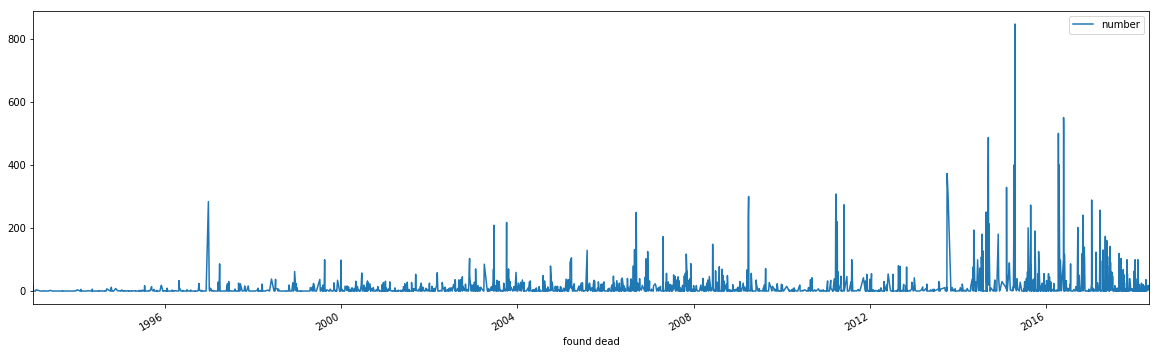

In [23]:
DailyDeaths_TS_Refugees_df.plot(figsize = (20,6))
plt.show()

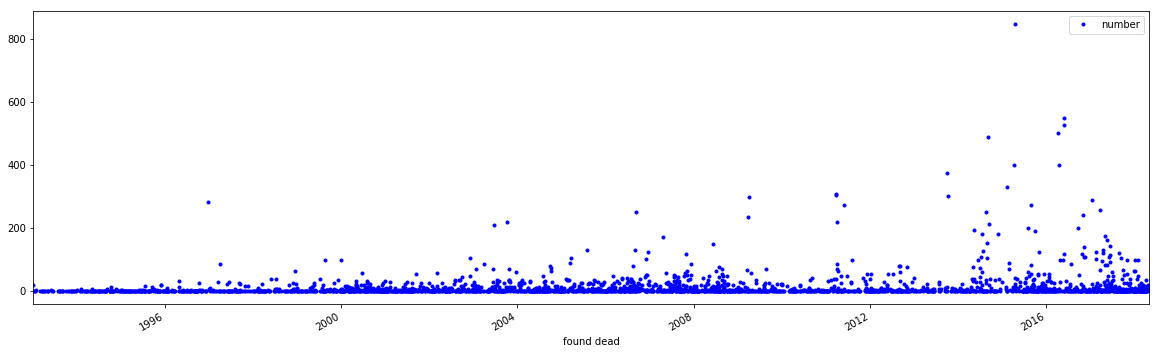

In [24]:
DailyDeaths_TS_Refugees_df.plot(figsize = (20,6), style = ".b")
plt.show()

In [62]:
months

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

{0: 'Jan',
 1: 'Feb',
 2: 'Mar',
 3: 'Apr',
 4: 'May',
 5: 'Jun',
 6: 'Jul',
 7: 'Aug',
 8: 'Sep',
 9: 'Oct',
 10: 'Nov',
 11: 'Dec'}

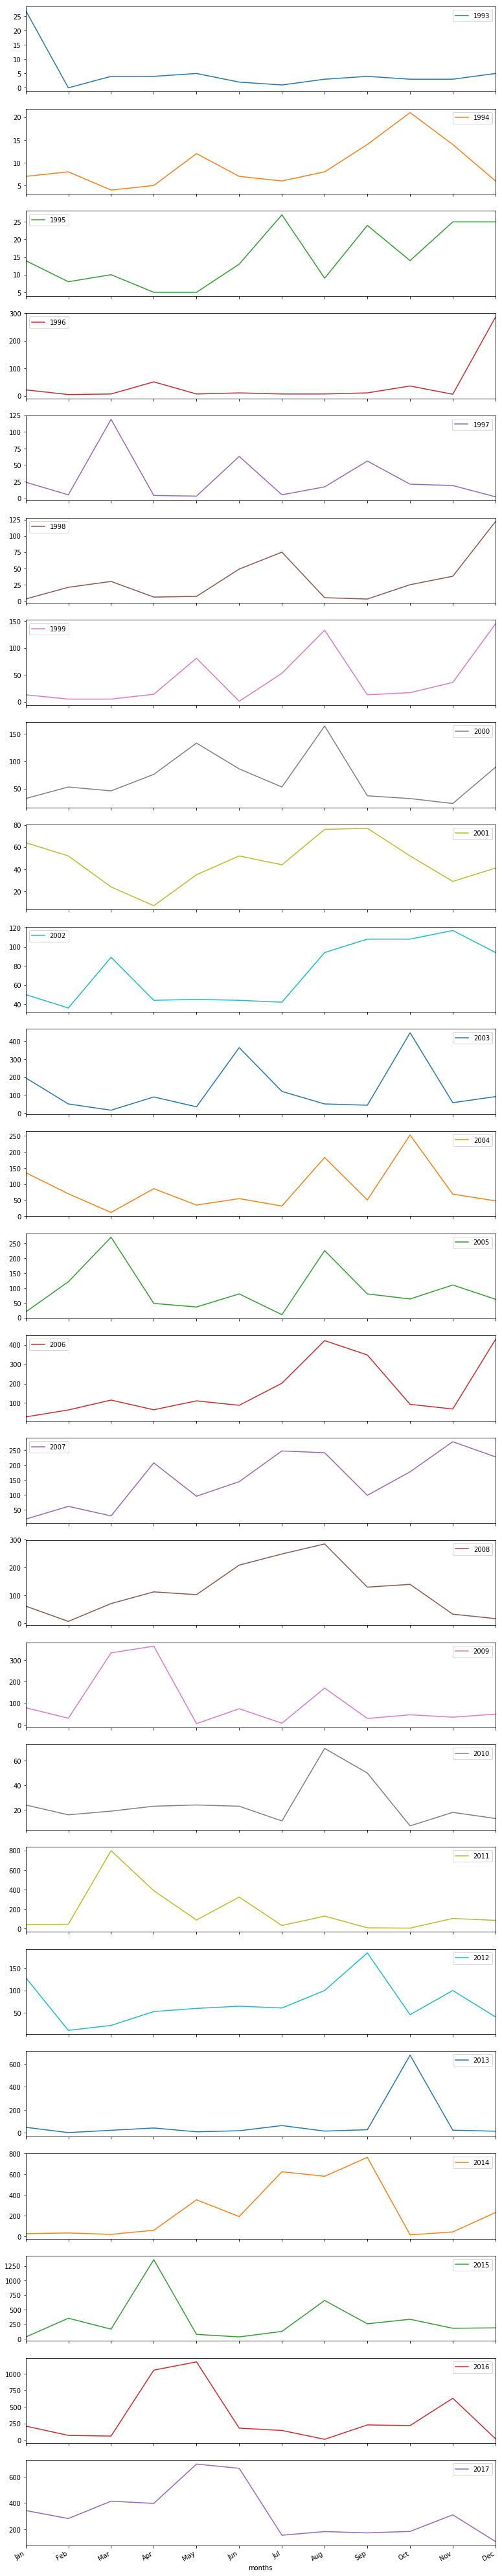

In [74]:
#Grouping Anually to Visualize yearly values
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
year_groups = DailyDeaths_TS_Refugees_df[:"2017"].groupby(pd.Grouper(freq = 'MS')).sum().groupby(pd.Grouper(freq = "YS"))
Annual_Deaths = pd.DataFrame()
for yr, group in year_groups:
    Annual_Deaths[yr.year] = group.values.ravel()
Annual_Deaths
Annual_Deaths.plot(figsize = (13,80), subplots=True, legend=True)
plt.xlabel("months")
plt.xticks(range(12), months)
plt.show()

In [36]:
year_groups

In [37]:
year_groups.count()

,number
found dead,
1993-01-01,12
1994-01-01,12
1995-01-01,12
1996-01-01,12
1997-01-01,12
1998-01-01,12
1999-01-01,12
2000-01-01,12
2001-01-01,12


In [ ]:
year_groups.__dict__